In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split


In [17]:
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Iteration 1, loss = 0.29694997
Iteration 2, loss = 0.12496631
Iteration 3, loss = 0.08841369
Iteration 4, loss = 0.06930931
Iteration 5, loss = 0.05698601
Iteration 6, loss = 0.04719773
Iteration 7, loss = 0.03970887
Iteration 8, loss = 0.03422572
Iteration 9, loss = 0.02818637
Iteration 10, loss = 0.02332231
Iteration 11, loss = 0.02026659
Iteration 12, loss = 0.01688749
Iteration 13, loss = 0.01383469
Iteration 14, loss = 0.01160176
Iteration 15, loss = 0.00947305
Iteration 16, loss = 0.00797596
Iteration 17, loss = 0.00698361
Iteration 18, loss = 0.00619540
Iteration 19, loss = 0.00494177
Iteration 20, loss = 0.00412853
Iteration 21, loss = 0.00353293
Iteration 22, loss = 0.00316605
Iteration 23, loss = 0.00276867
Iteration 24, loss = 0.00244868
Iteration 25, loss = 0.00231915
Iteration 26, loss = 0.00210165
Iteration 27, loss = 0.00198372
Iteration 28, loss = 0.00182288
Iteration 29, loss = 0.00171983
Iteration 30, loss = 0.00160844


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 1.000000
Test set score: 0.980600


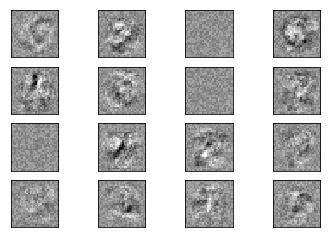

In [18]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=30, alpha=1e-5,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Iteration 1, loss = 0.32209889
Iteration 2, loss = 0.15737056
Iteration 3, loss = 0.11622056
Iteration 4, loss = 0.09543638
Iteration 5, loss = 0.08011915
Iteration 6, loss = 0.07079658
Iteration 7, loss = 0.06355978
Iteration 8, loss = 0.05651422
Iteration 9, loss = 0.05102062
Iteration 10, loss = 0.04597857
Iteration 11, loss = 0.04059365
Iteration 12, loss = 0.03801226
Iteration 13, loss = 0.03384728
Iteration 14, loss = 0.03152889
Iteration 15, loss = 0.02886785
Iteration 16, loss = 0.02469751
Iteration 17, loss = 0.02254811
Iteration 18, loss = 0.02066940
Iteration 19, loss = 0.01962979
Iteration 20, loss = 0.01770979
Iteration 21, loss = 0.01556846
Iteration 22, loss = 0.01424630
Iteration 23, loss = 0.01280082
Iteration 24, loss = 0.01172081
Iteration 25, loss = 0.01095272
Iteration 26, loss = 0.00963487
Iteration 27, loss = 0.00883642
Iteration 28, loss = 0.00764529
Iteration 29, loss = 0.00715923
Iteration 30, loss = 0.00612731


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 0.999117
Test set score: 0.974000
Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320
Iteration 11, loss = 0.04188246
Iteration 12, loss = 0.03864420
Iteration 13, loss = 0.03513415
Iteration 14, loss = 0.03222310
Iteration 15, loss = 0.02956183
Iteration 16, loss = 0.02620840
Iteration 17, loss = 0.02424569
Iteration 18, loss = 0.02129204
Iteration 19, loss = 0.02030622
Iteration 20, loss = 0.01848272
Iteration 21, loss = 0.01671861
Iteration 22, loss = 0.01520329
Iteration 23, loss = 0.01411466
Iteration 24, loss = 0.01292346
Iteration 25, loss = 0.01138195
Iteration 26, loss = 0.00996422
Iteration 27, loss = 0.00846271
Iteration 28, loss = 0.00736762
Iteration 29, loss = 0.00692193
Iteration 30, loss = 0.0054

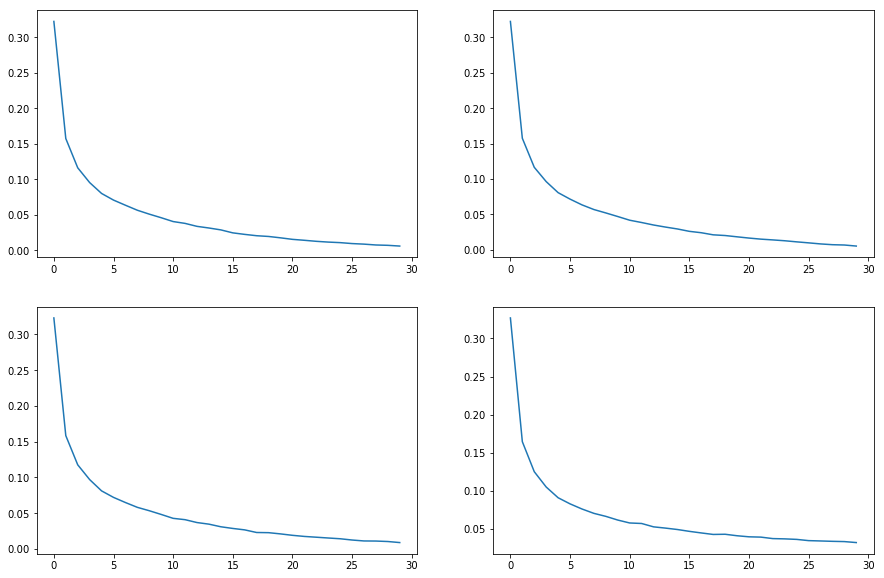

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, alfa in zip(axes.ravel(), [1e-5,1e-4,1e-3,1e-2]):
    mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, alpha=alfa,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    mlp1.fit(X_train, y_train)
    print("Training set score: %f" % mlp1.score(X_train, y_train))
    print("Test set score: %f" % mlp1.score(X_test, y_test))
    #mlps.append(mlp)
    ax.plot(mlp1.loss_curve_)
# labels = ['1e-5','1e-4','1e-3','1e-2']
# fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

Iteration 1, loss = 0.29694997
Iteration 2, loss = 0.12496631
Iteration 3, loss = 0.08841369
Iteration 4, loss = 0.06930931
Iteration 5, loss = 0.05698601
Iteration 6, loss = 0.04719773
Iteration 7, loss = 0.03970887
Iteration 8, loss = 0.03422572
Iteration 9, loss = 0.02818637
Iteration 10, loss = 0.02332231
Iteration 11, loss = 0.02026659
Iteration 12, loss = 0.01688749
Iteration 13, loss = 0.01383469
Iteration 14, loss = 0.01160176
Iteration 15, loss = 0.00947305
Iteration 16, loss = 0.00797596
Iteration 17, loss = 0.00698361
Iteration 18, loss = 0.00619540
Iteration 19, loss = 0.00494177
Iteration 20, loss = 0.00412853
Iteration 21, loss = 0.00353293
Iteration 22, loss = 0.00316605
Iteration 23, loss = 0.00276867
Iteration 24, loss = 0.00244868
Iteration 25, loss = 0.00231915
Iteration 26, loss = 0.00210165
Iteration 27, loss = 0.00198372
Iteration 28, loss = 0.00182288
Iteration 29, loss = 0.00171983
Iteration 30, loss = 0.00160844


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 1.000000
Test set score: 0.980600
Iteration 1, loss = 0.37885064
Iteration 2, loss = 0.16762768
Iteration 3, loss = 0.13572648
Iteration 4, loss = 0.11955250
Iteration 5, loss = 0.10739175
Iteration 6, loss = 0.10070052
Iteration 7, loss = 0.09601896
Iteration 8, loss = 0.08623889
Iteration 9, loss = 0.08191648
Iteration 10, loss = 0.07909834
Iteration 11, loss = 0.07544049
Iteration 12, loss = 0.07093967
Iteration 13, loss = 0.07054907
Iteration 14, loss = 0.06446125
Iteration 15, loss = 0.06573072
Iteration 16, loss = 0.06542161
Iteration 17, loss = 0.05675427
Iteration 18, loss = 0.05641216
Iteration 19, loss = 0.05782648
Iteration 20, loss = 0.05440113
Iteration 21, loss = 0.05103342
Iteration 22, loss = 0.05322626
Iteration 23, loss = 0.05041466
Iteration 24, loss = 0.04965349
Iteration 25, loss = 0.04797571
Iteration 26, loss = 0.04701077
Iteration 27, loss = 0.04940530
Iteration 28, loss = 0.04465146
Iteration 29, loss = 0.04527787
Iteration 30, loss = 0.0444

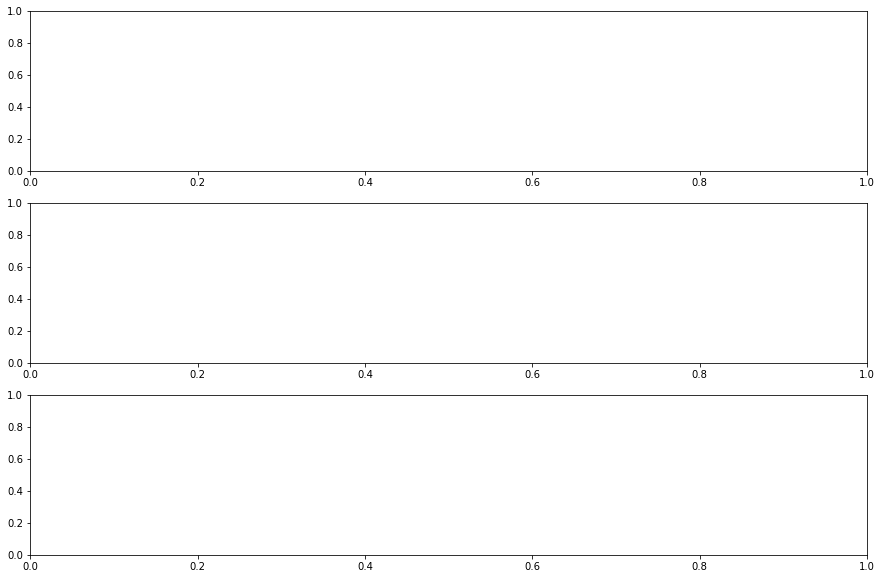

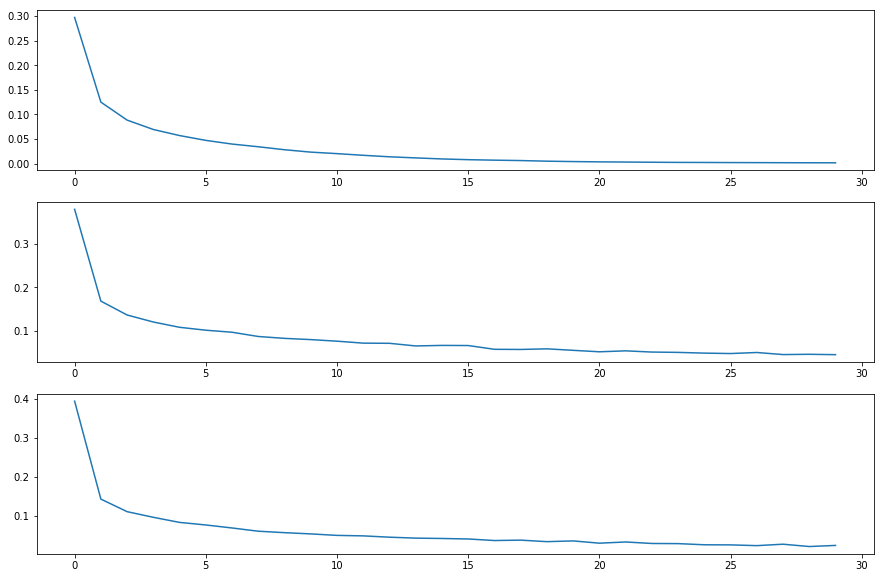

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for ax, layer in zip(axes.ravel(), [(100,),(30,10),(50,30,10)]):
    mlp1 = MLPClassifier(hidden_layer_sizes=layer, max_iter=30, alpha=1e-5,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    mlp1.fit(X_train, y_train)
    print("Training set score: %f" % mlp1.score(X_train, y_train))
    print("Test set score: %f" % mlp1.score(X_test, y_test))
    #mlps.append(mlp)
    ax.plot(mlp1.loss_curve_)
# labels = ['(100,)','(30,10)','(50,30,10)']
# fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


In [24]:

for layer in  ['sgd', 'lbfgs']:
    mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, alpha=1e-5,
                    solver=layer, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    mlp1.fit(X_train, y_train)
    print("Training set score: %f" % mlp1.score(X_train, y_train))
    print("Test set score: %f" % mlp1.score(X_test, y_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Training set score: 0.999117
Test set score: 0.974000
Training set score: 0.920167
Test set score: 0.922300
